In [82]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_drug_clinical_df = pd.merge(clinical_trial_data_df,mouse_drug_data_df,on="Mouse ID",how="outer")

# Display the data table for preview
mouse_drug_clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [83]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_by_drug_timepoint = mouse_drug_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean_by_drug_timepoint_df = pd.DataFrame(tumor_mean_by_drug_timepoint).reset_index()

# Preview DataFrame
tumor_mean_by_drug_timepoint_df.head(11)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [84]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_by_drug_timepoint = mouse_drug_clinical_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sem_by_drug_timepoint_df = pd.DataFrame(tumor_sem_by_drug_timepoint).reset_index()

# Preview DataFrame
tumor_sem_by_drug_timepoint_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [85]:
## Minor Data Munging to Re-Format the Data Frames
# Tumor Mean Re-Format PD Pivot 
tumor_mean_by_drug_timepoint_pt = tumor_mean_by_drug_timepoint_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
# Tumor SEM Re-Format PD Pivot
tumor_sem_by_drug_timepoint_pt = tumor_sem_by_drug_timepoint_df.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]

## Preview that Reformatting worked
tumor_mean_by_drug_timepoint_pt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


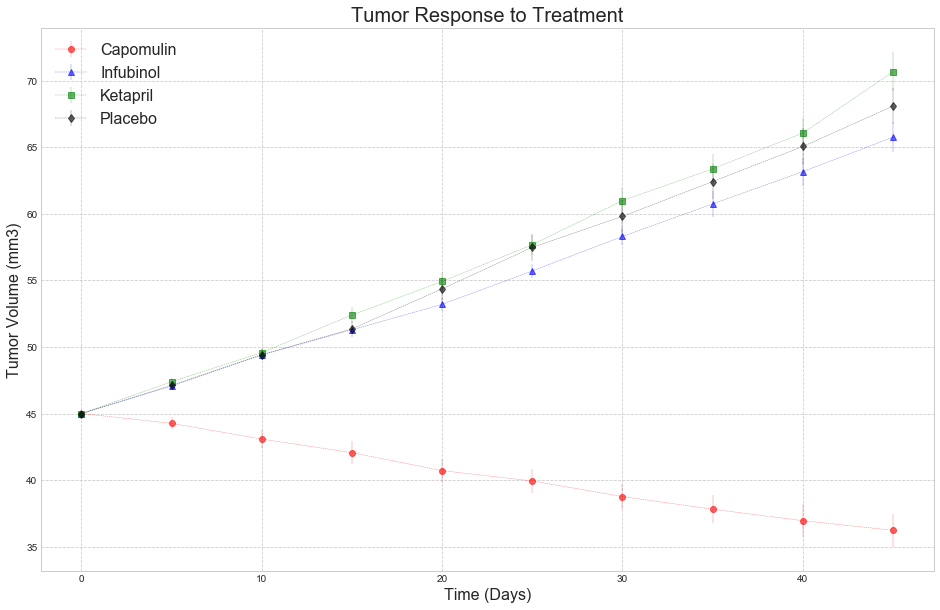

In [86]:
## Generate Figure
# Figure Size
plt.figure(figsize=(16,10))
# Plot the error bar for the tumor volume distribution by using drugs as: 1) Capomulin; 2) Infubinol; 3) Ketapril; 4) Placebo
plt.errorbar(tumor_mean_by_drug_timepoint_pt.index, tumor_mean_by_drug_timepoint_pt["Capomulin"], 
             yerr=tumor_sem_by_drug_timepoint_pt["Capomulin"], color="r", marker="o", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.errorbar(tumor_mean_by_drug_timepoint_pt.index, tumor_mean_by_drug_timepoint_pt["Infubinol"], 
             yerr=tumor_sem_by_drug_timepoint_pt["Infubinol"], color="b", marker="^", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.errorbar(tumor_mean_by_drug_timepoint_pt.index, tumor_mean_by_drug_timepoint_pt["Ketapril"], 
             yerr=tumor_sem_by_drug_timepoint_pt["Ketapril"], color="g", marker="s", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.errorbar(tumor_mean_by_drug_timepoint_pt.index, tumor_mean_by_drug_timepoint_pt["Placebo"], 
             yerr=tumor_sem_by_drug_timepoint_pt["Placebo"], color="k", marker="d", linestyle="dashed",linewidth=0.4,alpha=0.6)


## X and Y Axis Labels and Title
# Title
plt.title("Tumor Response to Treatment",fontsize=20)
# X Axis Label
plt.xlabel("Time (Days)",fontsize=16) 
# Y Axis Label
plt.ylabel("Tumor Volume (mm3)",fontsize=16) # set text for the y axis

## Other Customization
# Grid on
plt.grid(linestyle="dashed")
# Legend 
plt.legend(loc='best', fontsize=16, fancybox=True)

## Save the figure
plt.savefig("Tumor_Response_to_Treatment.png")

## Show the plot
plt.show()


## Metastatic Response to Treatment

In [87]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean_by_drug_timepoint = mouse_drug_clinical_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
meta_mean_by_drug_timepoint_df = pd.DataFrame(meta_mean_by_drug_timepoint).reset_index()

# Preview DataFrame
meta_mean_by_drug_timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [88]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem_by_drug_timepoint = mouse_drug_clinical_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
meta_sem_by_drug_timepoint_df = pd.DataFrame(meta_sem_by_drug_timepoint).reset_index()

# Preview DataFrame
meta_sem_by_drug_timepoint_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [89]:
## Minor Data Munging to Re-Format the Data Frames
# Met. Sites Mean Re-Format PD Pivot 
meta_mean_by_drug_timepoint_pt = meta_mean_by_drug_timepoint_df.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]
# Met. Sites SEM Re-Format PD Pivot
meta_sem_by_drug_timepoint_pt = meta_sem_by_drug_timepoint_df.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]

## Preview that Reformatting worked
meta_mean_by_drug_timepoint_pt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


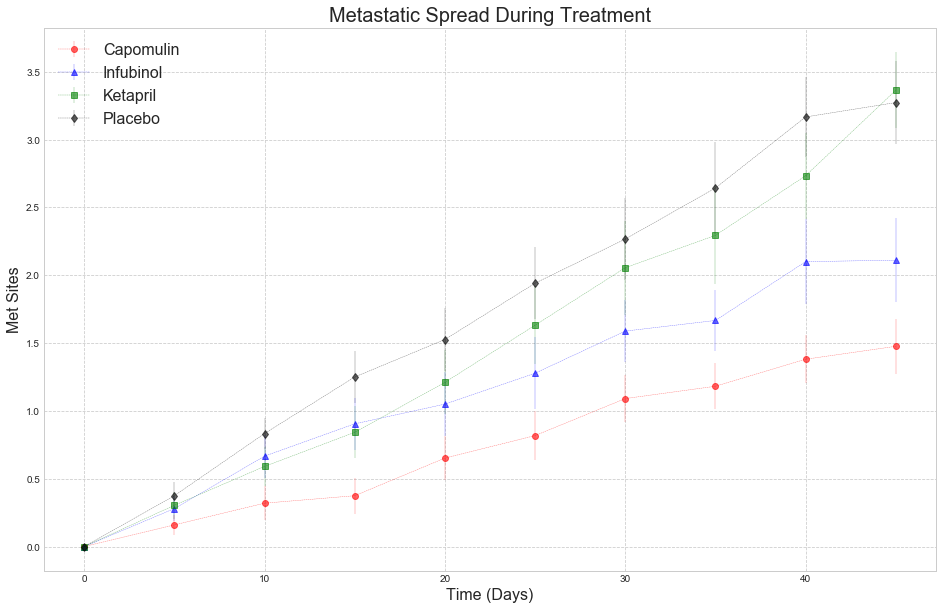

In [90]:
## Generate Figure
# Figure Size
plt.figure(figsize=(16,10))
# Plot the error bar for the Met. Sites distribution by using drugs as: 1) Capomulin; 2) Infubinol; 3) Ketapril; 4) Placebo
plt.errorbar(meta_mean_by_drug_timepoint_pt.index, meta_mean_by_drug_timepoint_pt["Capomulin"], 
             yerr=meta_sem_by_drug_timepoint_pt["Capomulin"], color="r", marker="o", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.errorbar(meta_mean_by_drug_timepoint_pt.index, meta_mean_by_drug_timepoint_pt["Infubinol"], 
             yerr=meta_sem_by_drug_timepoint_pt["Infubinol"], color="b", marker="^", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.errorbar(meta_mean_by_drug_timepoint_pt.index, meta_mean_by_drug_timepoint_pt["Ketapril"], 
             yerr=meta_sem_by_drug_timepoint_pt["Ketapril"], color="g", marker="s", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.errorbar(meta_mean_by_drug_timepoint_pt.index, meta_mean_by_drug_timepoint_pt["Placebo"], 
             yerr=meta_sem_by_drug_timepoint_pt["Placebo"], color="k", marker="d", linestyle="dashed",linewidth=0.4,alpha=0.6)


## X and Y Axis Labels and Title
# Title
plt.title("Metastatic Spread During Treatment",fontsize=20)
# X Axis Label
plt.xlabel("Time (Days)",fontsize=16) 
# Y Axis Label
plt.ylabel("Met Sites",fontsize=16) # set text for the y axis

## Other Customization
# Grid on
plt.grid(linestyle="dashed")
# Legend 
plt.legend(loc='best', fontsize=16, fancybox=True)

## Save the figure
plt.savefig("Metastatic_Spread_During_Treatment.png")

## Show the plot
plt.show()


## Survival Rates

In [91]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates_by_drug_timepoint = mouse_drug_clinical_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
survival_rates_by_drug_timepoint_df = pd.DataFrame(survival_rates_by_drug_timepoint).reset_index()
survival_rates_by_drug_timepoint_df = survival_rates_by_drug_timepoint_df.rename(columns={"Mouse ID":"Survival Count"})

# Preview DataFrame
survival_rates_by_drug_timepoint_df.head()

,Drug,Timepoint,Survival Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [92]:
## Minor Data Munging to Re-Format the Data Frames
# Survival Counts Re-Format PD Pivot
survival_rates_by_drug_timepoint_pt = survival_rates_by_drug_timepoint_df.pivot(index="Timepoint",columns="Drug")["Survival Count"]
## Preview the Data Frame
survival_rates_by_drug_timepoint_pt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


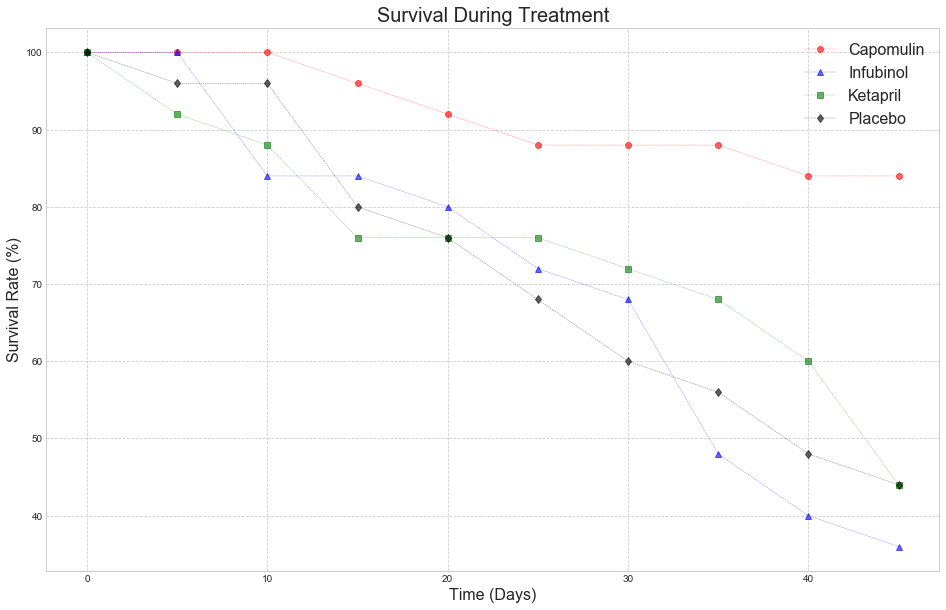

In [93]:
## Generate the Plot (Accounting for percentages)
# Figure Size
plt.figure(figsize=(16,10))
# Plot the Survival Percentage by using drugs as: 1) Capomulin; 2) Infubinol; 3) Ketapril; 4) Placebo
plt.plot(survival_rates_by_drug_timepoint_pt.index, survival_rates_by_drug_timepoint_pt["Capomulin"]/25*100, 
             color="r", marker="o", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.plot(survival_rates_by_drug_timepoint_pt.index, survival_rates_by_drug_timepoint_pt["Infubinol"]/25*100, 
             color="b", marker="^", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.plot(survival_rates_by_drug_timepoint_pt.index, survival_rates_by_drug_timepoint_pt["Ketapril"]/25*100, 
             color="g", marker="s", linestyle="dashed",linewidth=0.4,alpha=0.6)
plt.plot(survival_rates_by_drug_timepoint_pt.index, survival_rates_by_drug_timepoint_pt["Placebo"]/25*100, 
             color="k", marker="d", linestyle="dashed",linewidth=0.4,alpha=0.6)

## X and Y Axis Labels and Title
# Title
plt.title("Survival During Treatment",fontsize=20)
# X Axis Label
plt.xlabel("Time (Days)",fontsize=16) 
# Y Axis Label
plt.ylabel("Survival Rate (%)",fontsize=16) # set text for the y axis

## Other Customization
# Grid on
plt.grid(linestyle="dashed")
# Legend 
plt.legend(loc='best', fontsize=16, fancybox=True)

## Save the figure
plt.savefig("Survival_Rates.png")

## Show the plot
plt.show()

## Summary Bar Graph

In [94]:
# Calculate the percent changes for each drug
tumor_volume_pct_change =  100 * (tumor_mean_by_drug_timepoint_pt.iloc[-1] - tumor_mean_by_drug_timepoint_pt.iloc[0]) / tumor_mean_by_drug_timepoint_pt.iloc[0]
# Display the data to confirm
tumor_volume_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

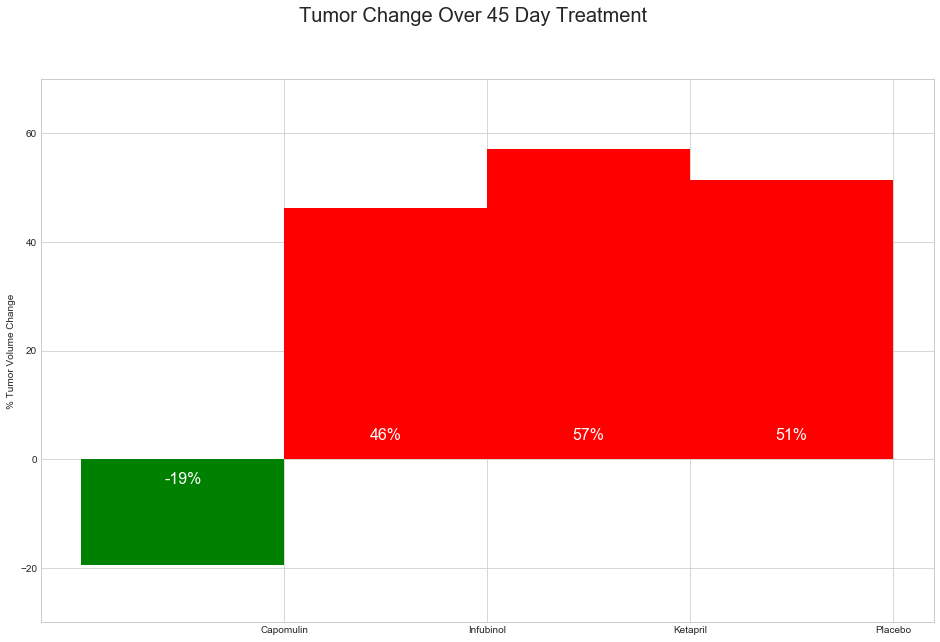

In [95]:
# Store all Relevant Percent Changes into a Tuple
tumor_volume_pct_change_with_chosen_drugs = (tumor_volume_pct_change["Capomulin"], 
                                           tumor_volume_pct_change["Infubinol"], 
                                           tumor_volume_pct_change["Ketapril"], 
                                           tumor_volume_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots(figsize = (16,10))
plot_index = np.arange(len(tumor_volume_pct_change_with_chosen_drugs)) 
# Plot the bar chart and update "ax_bars" and "PassFailVec" for section "Labeling the percentages of changes"
ax_bars = []
PassFailVec = []
for i in plot_index:
    if tumor_voume_pct_change_with_chosen_drugs[i] < 0:
        ax_bars.append(ax.bar(plot_index[i], tumor_volume_pct_change_with_chosen_drugs[i], width = 1, color='green'))
        PassFailVec.append("Pass")
    else:
        ax_bars.append(ax.bar(plot_index[i], tumor_volume_pct_change_with_chosen_drugs[i], width = 1,color='red'))
        PassFailVec.append("Fail")
    
# Orient widths. Add labels, tick marks, etc. 
fig.suptitle("Tumor Change Over 45 Day Treatment",fontsize=20)
ax.set_ylabel('% Tumor Volume Change')
ax.set_xticks(plot_index + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabel(ax_bars,PassFailVec):
    """
    Attach a text label in each bar displaying its height
    """
    num_bars = len(ax_bars)
    for i_bar in range(num_bars):
        rects = ax_bars[i_bar]
        for rect in rects:
            # Depends on tumor volume percent change, the following logic would determine the height for the text
            if PassFailVec[i_bar] == "Pass":
                ax.text(rect.get_x() + rect.get_width()/2., -5,
                        '%d%%' % int(tumor_volume_pct_change_with_chosen_drugs[i_bar]),
                        ha='center', va='bottom',color='white',fontsize=16)
            else:
                ax.text(rect.get_x() + rect.get_width()/2., 3,
                        '%d%%' % int(tumor_volume_pct_change_with_chosen_drugs[i_bar]),
                        ha='center', va='bottom',color='white',fontsize=16)

# Call functions to implement the function calls
autolabel(ax_bars,PassFailVec)
# Save the Figure
fig.savefig("Tumor_Perctage_Change_Summary.png")

# Show the Figure
fig.show()